Connected to .venv (Python 3.8.10)

 # Customer Churn Prediction Analysis

 **Objective:** To analyze the Telco Customer Churn dataset, build a predictive model to identify customers likely to churn, and provide actionable business recommendations.


 ## 1. Data Exploration and Cleaning

 In this section, we will load the dataset and perform initial exploratory data analysis (EDA). We'll check for missing values, examine data types, and clean the data as needed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
# Load the dataset
df = pd.read_csv('Q2 Dataset.csv')

# Initial inspection
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

 ### 1.1 Clean the `TotalCharges` Column

 The `TotalCharges` column should be numeric, but it's currently an object type. This is likely due to empty spaces for new customers. We will convert it to a numeric type and handle any resulting missing values.

In [ ]:
# Convert 'TotalCharges' to a numeric type. 'coerce' will turn non-numeric values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Find out how many missing values were created
print(f"Number of missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Inspect the rows with missing TotalCharges
# These are typically new customers with 0 tenure.
print("\nRows with missing TotalCharges:")
print(df[df['TotalCharges'].isnull()])

# Fill missing values. Since these are new customers, 0 is a logical fill value.
df['TotalCharges'].fillna(0, inplace=True)

# Verify that the column is now numeric and has no missing values
print("\nDataset Information after cleaning TotalCharges:")
df.info()

Number of missing values in TotalCharges: 11

Rows with missing TotalCharges:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \


 ### 1.2 Exploratory Data Visualization

 Now that the data is clean, we'll create some visualizations to better understand the relationships between different features and customer churn.

Churn Distribution:


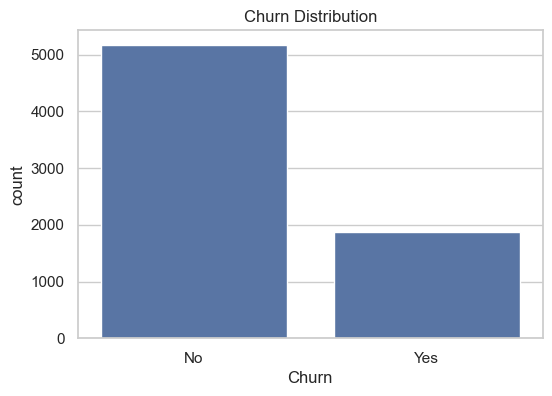

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Churn distribution
print("Churn Distribution:")
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

 #### Numerical Features vs. Churn


Distribution of Numerical Features by Churn:


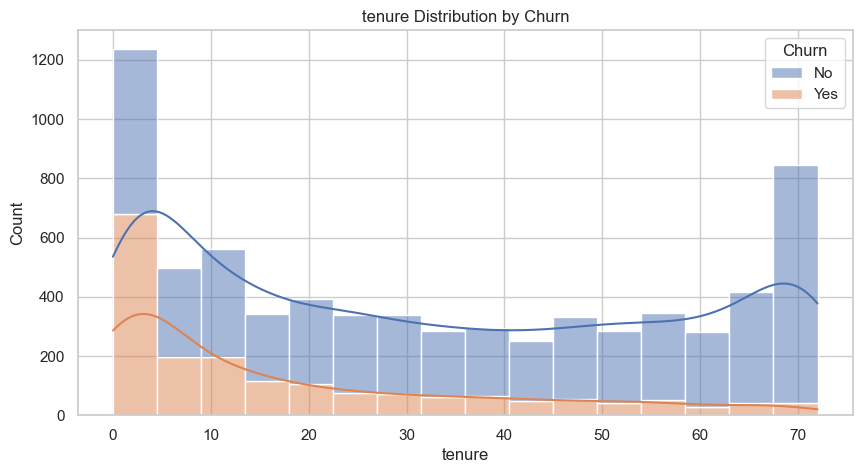

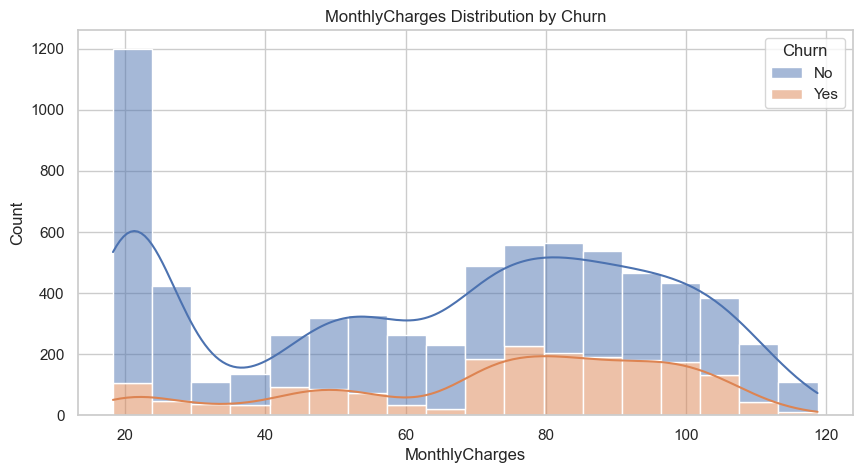

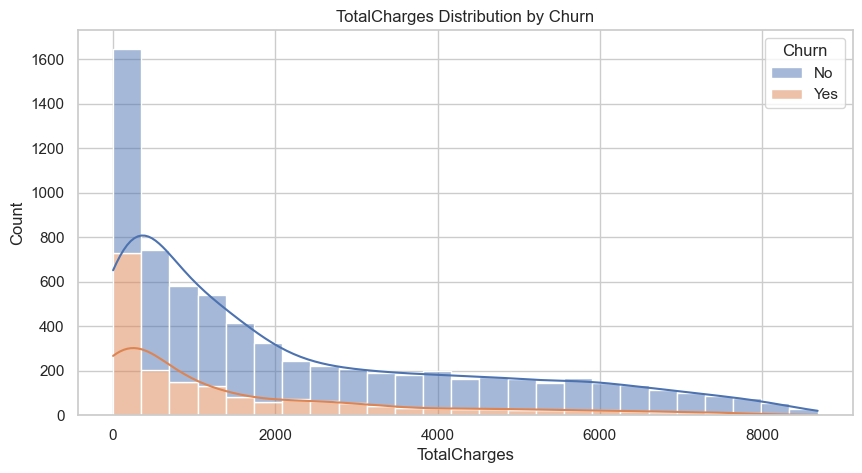

In [ ]:
# Plot distribution of numerical features for churned vs. non-churned customers
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("\nDistribution of Numerical Features by Churn:")
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, hue='Churn', multiple='stack', kde=True)
    plt.title(f'{feature} Distribution by Churn')
    plt.show()

 #### Categorical Features vs. Churn


Churn Rate by Key Categorical Features:


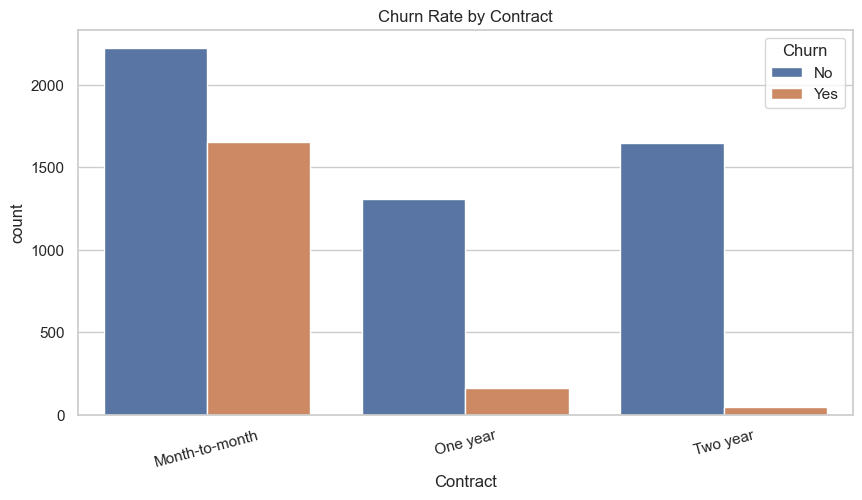

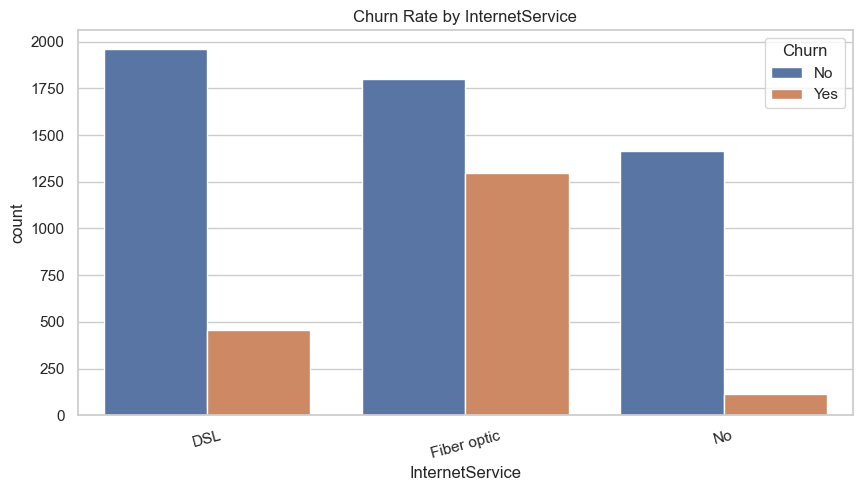

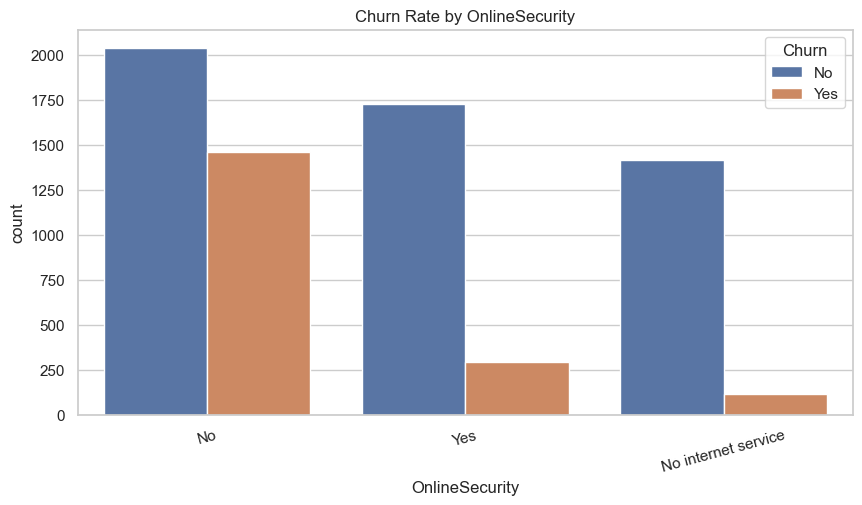

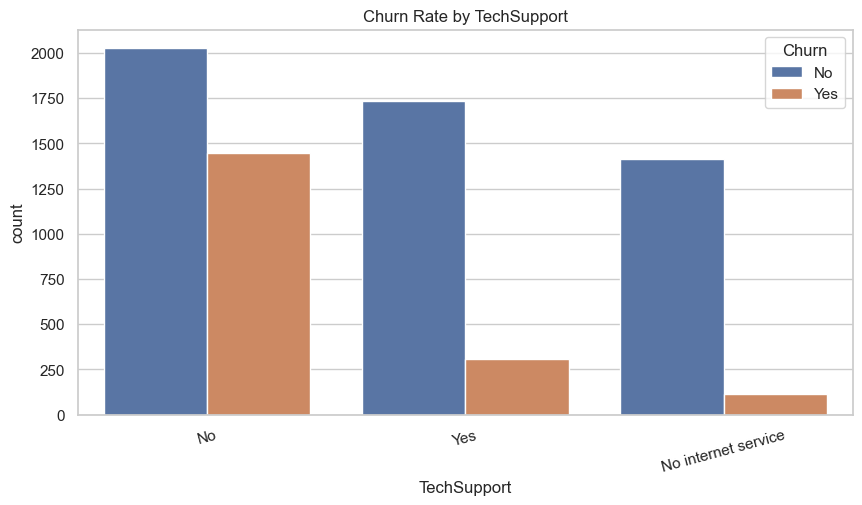

In [ ]:
# Plot churn rate for key categorical features
# We'll look at a few of the most impactful ones
categorical_features = ['Contract', 'InternetService', 'OnlineSecurity', 'TechSupport']
print("\nChurn Rate by Key Categorical Features:")
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Rate by {feature}')
    plt.xticks(rotation=15)
    plt.show()
#

 ## 2. Feature Engineering

 Based on the visualizations, we can see that tenure, contract type, and the services a customer has are strong indicators of churn. We will create new features to help the model capture these relationships more effectively.

In [ ]:
# 1. Create a binary feature for new customers (1 year or less)
df['IsNewCustomer'] = (df['tenure'] <= 12).astype(int)

# 2. Create a feature for total number of 'support' services
support_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
df['TotalSupportServices'] = df[support_services].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0})).sum(axis=1)

# 3. Create a binary feature for customers without any key support
df['NoKeySupport'] = ((df['OnlineSecurity'] == 'No') & (df['TechSupport'] == 'No')).astype(int)


# Display the new features to verify
print("DataFrame with new features (sample):")
print(df[['tenure', 'IsNewCustomer', 'OnlineSecurity', 'TechSupport', 'NoKeySupport', 'TotalSupportServices']].sample(n=10, random_state=42))
#

DataFrame with new features (sample):
      tenure  IsNewCustomer       OnlineSecurity          TechSupport  \
185        1              1                   No                   No   
2715      41              0  No internet service  No internet service   
3825      52              0  No internet service  No internet service   
1807       1              1                   No                   No   
132       67              0                   No                  Yes   
1263      68              0                   No                   No   
3732      23              0                  Yes                  Yes   
1672      72              0                  Yes                  Yes   
811       70              0                  Yes                  Yes   
2526       1              1  No internet service  No internet service   

      NoKeySupport  TotalSupportServices  
185              1                     0  
2715             0                     0  
3825             0           

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Make a copy to avoid changing the original dataframe during preprocessing
df_model = df.copy()

# Drop customerID as it is not a predictive feature
df_model.drop('customerID', axis=1, inplace=True)

# Convert the target variable 'Churn' to binary
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})

# Also encode other binary features
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df_model[col] = df_model[col].map({'Yes': 1, 'No': 0})

# Separate features (X) and target (y)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Identify categorical and numerical features for the preprocessor
# We'll one-hot encode the object columns and scale the numeric ones
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=np.number).columns

print("Categorical features to be one-hot encoded:")
print(categorical_features)
print("\nNumerical features to be scaled:")
print(numerical_features)

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Split the data into training and testing sets
# We use stratify=y to ensure the churn distribution is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
#

Categorical features to be one-hot encoded:
Index(['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'],
      dtype='object')

Numerical features to be scaled:
Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'IsNewCustomer',
       'TotalSupportServices', 'NoKeySupport'],
      dtype='object')

Training set shape: (5634, 22)
Testing set shape: (1409, 22)


 ## 4. Model Training

 Now we will define our models and wrap them in a scikit-learn Pipeline. The pipeline will first apply our preprocessor to the data and then pass the transformed data to the model.

 We will train two models to compare:
 1.  **Logistic Regression**: A simple, interpretable baseline.
 2.  **Random Forest**: A more powerful ensemble model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create the pipelines
# A pipeline chains the preprocessor and the model together.

# Pipeline for Logistic Regression
# We use class_weight='balanced' to help with the imbalanced dataset.
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
])

# Pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Train the models
print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

print("\nTraining Random Forest model...")
rf_pipeline.fit(X_train, y_train)
print("Random Forest model trained successfully.")
#

Training Logistic Regression model...
Logistic Regression model trained successfully.

Training Random Forest model...
Random Forest model trained successfully.


 ## 5. Model Evaluation

 Now we'll evaluate our trained models on the test set. We will look at the classification report, confusion matrix, and the ROC-AUC score to determine which model performs better.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create the pipelines
# A pipeline chains the preprocessor and the model together.

# Pipeline for Logistic Regression
# We use class_weight='balanced' to help with the imbalanced dataset.
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
])

# Pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Train the models
print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

print("\nTraining Random Forest model...")
rf_pipeline.fit(X_train, y_train)
print("Random Forest model trained successfully.")
#

Training Logistic Regression model...
Logistic Regression model trained successfully.

Training Random Forest model...
Random Forest model trained successfully.


 ## 5. Model Evaluation

 Now we'll evaluate our trained models on the test set. We will look at the classification report, confusion matrix, and the ROC-AUC score to determine which model performs better.

--- Logistic Regression Evaluation ---
              precision    recall  f1-score   support

    No Churn       0.90      0.72      0.80      1035
       Churn       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



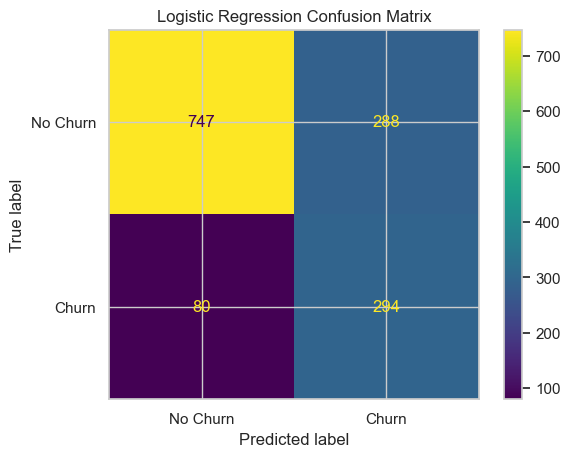


--- Random Forest Evaluation ---
              precision    recall  f1-score   support

    No Churn       0.82      0.89      0.86      1035
       Churn       0.61      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



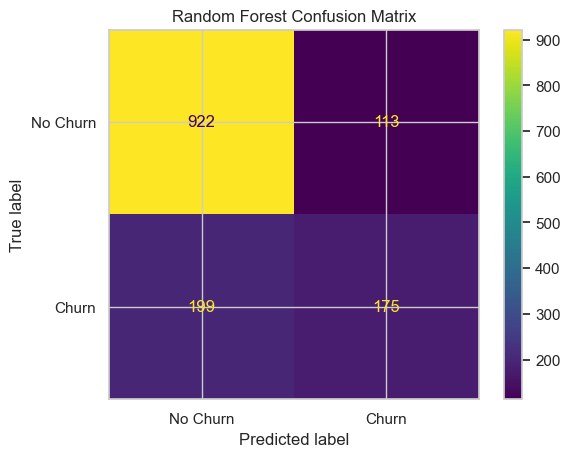


--- ROC Curve Comparison ---


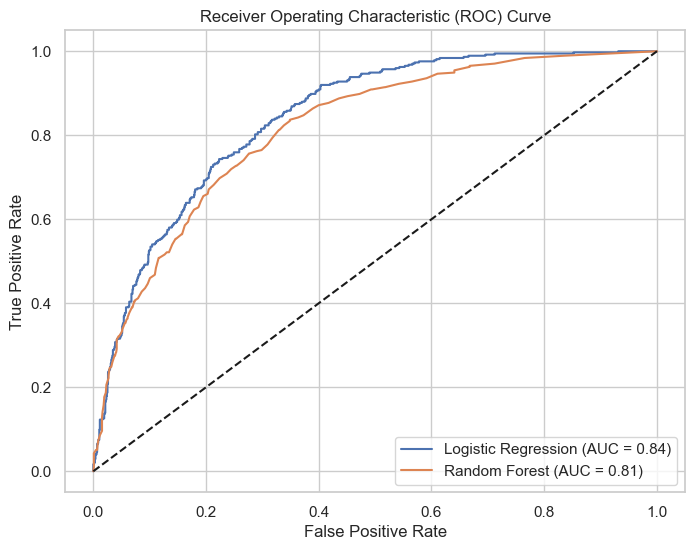

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- Evaluate Logistic Regression Model ---
print("--- Logistic Regression Evaluation ---")
y_pred_lr = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Churn']))

# Plot Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No Churn', 'Churn'])
disp_lr.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


# --- Evaluate Random Forest Model ---
print("\n--- Random Forest Evaluation ---")
y_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Churn', 'Churn'])
disp_rf.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()


# --- ROC Curve Comparison ---
print("\n--- ROC Curve Comparison ---")
plt.figure(figsize=(8, 6))

# Logistic Regression ROC
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Forest ROC
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plotting
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#

 ## 6. Interpretation and Recommendations

 Finally, we will interpret the model's results to identify the key drivers of churn and propose actionable recommendations for the business to help retain customers.

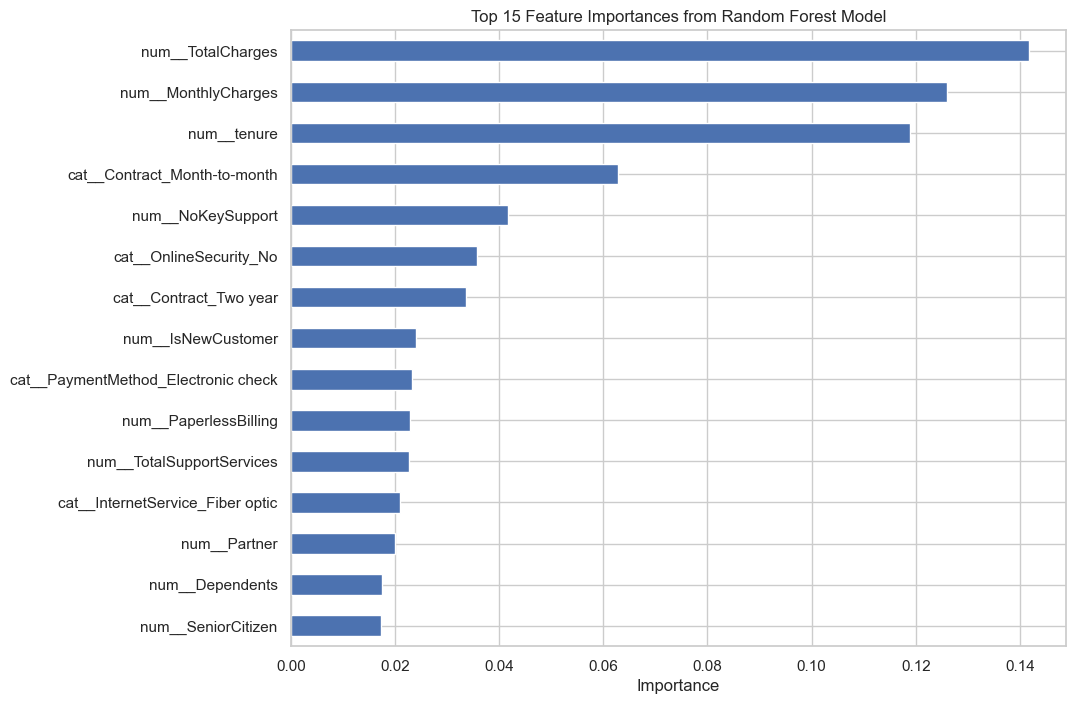

In [ ]:
# Extract feature importances from the Random Forest pipeline
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Get the feature names from the preprocessor
# This includes the one-hot encoded column names
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a pandas series to view feature importances
importances = pd.Series(feature_importances, index=feature_names)

# Sort features by importance
sorted_importances = importances.sort_values(ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 8))
sorted_importances.head(15).sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.show()